In [ ]:
### Paired Samples t-test
# 하나의 집단에서 보통  전(before)/후(after)의 관계를 확인할 때 사용
# 사용되는 함수 :ttest_rel(x, y)
#   x = before, y= after
# - 검증 : p-value > 0.05(전후 상관없음 = 차이없음)
#       : p-value <= 0.05(전후 상관있음 = 차이있음)

### exe-1) 야식을 먹기전과 먹은후의 몸무게 차이 점검
##### - 귀무가설 : 야식을 먹기전과 먹은후의 몸무게의 차이가 없다.
##### - 대립가설 : 야식을 먹기전과 먹은후의 몸무게의 차이가 있다.

In [16]:
import numpy as np
from scipy import stats as stats

# 야식 복용 전 몸무게 랜덤 생성
beforeWeights = np.random.randint(low=40, high=90, size=20)
print("beforeWeights = ", beforeWeights)
print()

# 야식 복용 후 몸무게 랜덤 생성
tmp_list = []
for weight in beforeWeights :
    # 0.99-0.02 ~ 0.99+0.02 
    tmp_list.append(weight * np.random.normal(0.99, 0.02))

afterWeights = np.array(tmp_list)
print("afterWeights = ", afterWeights)

# 전/후 검증하기
result = stats.ttest_rel(beforeWeights, afterWeights)
print("검정 결과 = ", result)
print("검정 통계량 = %.3f,   p-value = %.3f" % (result))

# (해석)
# 1. p-value = 0.027 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 전/후 데이터 차이는 있다.
#                : 야식을 먹기전과 먹은후는 몸무게 차이가 발생한다.

beforeWeights =  [40 54 73 69 62 62 57 60 46 55 52 74 72 51 61 41 48 46 79 45]

afterWeights =  [39.3268982  53.83020797 71.85912314 67.20359719 62.89699588 58.62648457
 55.69927059 59.47176683 44.8436959  55.28230176 50.79279426 72.4894823
 71.39129245 52.2515918  57.79361953 42.69032965 45.81486648 47.11812627
 78.8365911  44.12349339]
검정 결과 =  Ttest_relResult(statistic=2.398595031007291, pvalue=0.02688349616911914)
검정 통계량 = 2.399,   p-value = 0.027


### exe-2) 특강 전/후 시험점수의 차이 검정
##### - 귀무가설 : 특강 전/후 시험점수의 차이가 없다.
##### - 대립가설 : 특강 전/후 시험점수의 차이가 있다.

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from seaborn.distributions import distplot

In [35]:
# 데이터 생성하기
# 랜덤값 시드(seed) 임의로 생성
np.random.seed(7672)

# 특강전 데이터 : 랜덤하게 80을 기준으로 +-10, 100개 생성
beforelecture = np.random.randint(low=70, high=90, size=100)
print("beforelecture = ", beforelecture)

# 특강후 데이터 : 랜덤하게 77을 기준으로 +-10, 100개 생성
afterlecture = np.random.randint(low=67, high=87, size=100)
print("afterlecture = ", afterlecture)

# 정규성 검사

# 정규성 시각화 (한글처리 포함)

# 전/후 검정

# 해석

beforelecture =  [81 72 78 87 70 86 87 70 81 72 74 86 89 83 88 87 81 75 79 73 88 88 84 72
 88 76 87 77 72 73 89 86 89 80 70 81 75 86 82 72 82 77 70 77 83 82 78 72
 72 82 75 84 70 82 83 78 78 73 88 78 83 71 89 70 72 73 71 71 75 73 79 88
 71 73 89 80 89 71 88 78 72 82 84 85 77 82 83 81 81 81 78 80 70 71 81 85
 86 80 77 77]
afterlecture =  [78 85 73 83 72 69 72 86 86 68 73 80 83 81 81 79 73 67 71 82 67 68 71 84
 70 67 78 67 67 71 69 70 70 78 81 76 78 81 82 83 77 71 71 78 69 80 68 82
 74 67 80 77 83 75 80 77 70 81 69 86 83 79 77 84 78 83 86 84 75 69 80 78
 68 72 80 80 79 69 68 82 80 79 73 82 72 79 67 68 79 72 85 69 72 80 86 84
 70 84 76 76]


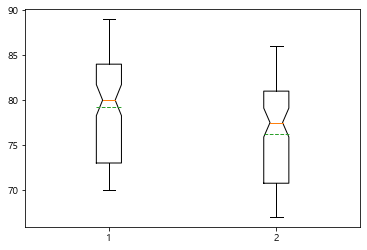

In [40]:
# 평균(중앙점) 추이 분석 - 박스플롯 이용
plt.boxplot([beforelecture, afterlecture],
            meanline = True,
            showmeans = True,
            notch = True)
plt.show()

In [36]:
# 정규성 검정(stats.shapiro())
# 검증 시 대부분의 집단은 정규분포를 따른다는 가정하에 진행하는 것이 일반적
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 띈다.

resultSh = stats.shapiro(beforelecture)
print("정규성 검정 결과 = ", resultSh)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.000 < 0.05 이므로, 정규성을 만족하지 않는다.
print()

resultSh = stats.shapiro(afterlecture)
print("정규성 검정 결과 = ", resultSh)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.000 < 0.05 이므로, 정규성을 만족하지 않는다.

정규성 검정 결과 =  ShapiroResult(statistic=0.9320595860481262, pvalue=6.526085053337738e-05)
t-검정 통계량 = 0.932,    p-value = 0.000

정규성 검정 결과 =  ShapiroResult(statistic=0.9296281933784485, pvalue=4.741075827041641e-05)
t-검정 통계량 = 0.930,    p-value = 0.000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


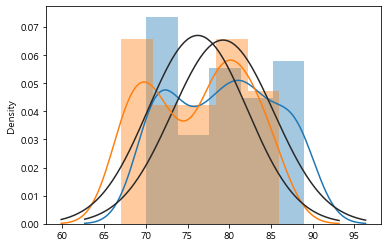

In [37]:
# 정규분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리
plt.rc("font", family = "Malgun Gothic")

# x: 데이터 집합
# stats.norm : 정규 분포 표시
sns.distplot(beforelecture, fit=stats.norm)
sns.distplot(afterlecture, fit=stats.norm)
plt.show()

In [41]:
# 검증하기 (Independent Samples t-test)
# 첫번째 : 기준집단, 
# 두번째 : 관측집단

result = stats.ttest_rel(beforelecture, afterlecture)

print("두 집단 평균 검정 (단일 표본검정) = ", result)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(result))

# (해석 - 검증결과)
# 1. p-value = 0.001 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 전/후 데이터 차이는 있다.
#                 : 특강 전/후 시험점수의 차이가 있다.

두 집단 평균 검정 (단일 표본검정) =  Ttest_relResult(statistic=3.3331849969011342, pvalue=0.0012085827930215255)
t-검정 통계량 = 3.333,    p-value = 0.001


### exe-2) 정답

In [ ]:
# 데이터 생성하기
# 랜덤값 시드(seed) 임의로 생성

# 특강전 데이터 : 랜덤하게 80을 기준으로 +-10, 100개 생성
beforelecture = np.random.randint(low=70, high=90, size=100)
print("beforelecture = ", beforelecture)

# 특강후 데이터 : 랜덤하게 77을 기준으로 +-10, 100개 생성
afterlecture = np.random.randint(low=67, high=87, size=100)
print("afterlecture = ", afterlecture)

# 정규성 검사

# 정규성 시각화 (한글처리 포함)

# 전/후 검정

# 해석

In [69]:
### 데이터 생성하기
np.random.seed(12)

# 특강 전
x1 = np.random.normal(80, 10, 100)
print("특강 전 x1 = ", x1)
print()

# 특강 후
x2 = np.random.normal(77, 10, 100)
print("특강 후 x2 = ", x2)
print()

특강 전 x1 =  [ 84.72985831  73.18574121  82.42439497  62.99264366  87.53142834
  64.6527866   80.05127078  78.7977233   71.93018121 108.71819395
  74.02177081  84.72456994  90.95956118  67.84831199  93.42356371
  78.77850212  90.12515477  70.86130853  69.70469793  92.0979645
  85.01872304  81.38846177  86.40761113  85.27332665  68.45639765
  57.86666521  63.1824349   62.11905749  57.81465055  73.5256922
  74.71595679  79.60790825  82.14975948  76.15641197  77.46095922
  80.73252075  70.02796163  72.86143712  80.35416346  73.22054635
  74.28118938  78.94137685  93.35831339  83.18665288  76.6240475
  74.14731722  78.85080059 102.41817794  48.52583478  85.35135893
  82.32490439  88.67611951  68.51787286 101.14344241  90.00942761
  79.48585005  81.59787698  72.83736414  80.50522827  78.56662585
  89.43575391  83.57644225  79.16550797  86.77806103  85.56060374
  82.22719461  64.71014521  90.29211176  68.33741241  69.90438348
  78.94732011  85.12022158  94.07727764  63.12303669  94.71233993
  

In [43]:
# 정규성 검정(stats.shapiro())
# 검증 시 대부분의 집단은 정규분포를 따른다는 가정하에 진행하는 것이 일반적
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 띈다.

resultSh = stats.shapiro(x1)
print("정규성 검정 결과 = ", resultSh)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.994 > 0.05 이므로, 정규성을 만족한다.
print()

resultSh = stats.shapiro(x2)
print("정규성 검정 결과 = ", resultSh)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.799 > 0.05 이므로, 정규성을 만족한다.

정규성 검정 결과 =  ShapiroResult(statistic=0.9961193799972534, pvalue=0.9942135810852051)
t-검정 통계량 = 0.996,    p-value = 0.994

정규성 검정 결과 =  ShapiroResult(statistic=0.9916926622390747, pvalue=0.7985416054725647)
t-검정 통계량 = 0.992,    p-value = 0.799


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


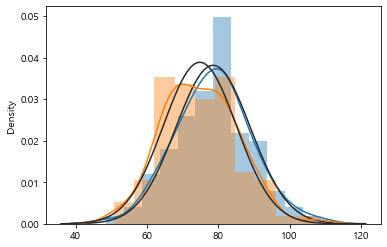

In [44]:
# 정규분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리
plt.rc("font", family = "Malgun Gothic")

# x: 데이터 집합
# stats.norm : 정규 분포 표시
sns.distplot(x1, fit=stats.norm)
sns.distplot(x2, fit=stats.norm)
plt.show()

In [45]:
'''
### 등분산성 검증 : 하나의 집단인 경우에는 등분산성 검증을 하지 않는다.

# - 귀무가설 : 두 집단간 분산이 동일하다. (p-value > 0.05)
# - 대립가설 : 두 집단간 분산이 동일하지 않다.

# 등분산성 검증 3가지 방법으로 진행됩니다.
# 1. levene(레빈) 방법
# 2. fligner(플리그너) 방법
# 3. bartlett(바틀렛) 방법

# 1. levene(레빈) 방법
sLevene = stats.levene(x1, x2)

print("등분산성 levene 검증결과 = ", sLevene)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(sLevene))

# (해석)
# 1. p-value = 0.712 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족
print()

# 2. fligner(플리그너) 방법
sFligner = stats.fligner(x1, x2)

print("등분산성 fligner 검증결과 = ", sFligner)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(sFligner))

# (해석)
# 1. p-value = 0.705 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족

print()
# 3. bartlett(바틀렛) 방법
sBartlett = stats.bartlett(x1, x2)

print("등분산성 bartlett 검증결과 = ", sBartlett)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(sBartlett))

# (해석)
# 1. p-value = 0.604 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 두 집단간 등분산성 만족
'''

등분산성 levene 검증결과 =  LeveneResult(statistic=0.06929364834301127, pvalue=0.7926417456653776)
t-검정 통계량 = 0.069,    p-value = 0.793

등분산성 fligner 검증결과 =  FlignerResult(statistic=0.09634841717764164, pvalue=0.7562564791467304)
t-검정 통계량 = 0.096,    p-value = 0.756

등분산성 bartlett 검증결과 =  BartlettResult(statistic=0.03510344807544348, pvalue=0.8513790552865215)
t-검정 통계량 = 0.035,    p-value = 0.851


In [46]:
# 전/후 검증하기
result = stats.ttest_rel(x1, x2)
print("검정 결과 = ", result)
print("검정 통계량 = %.3f,   p-value = %.3f" % (result))

# (해석)
# 1. p-value = 0.019 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 전/후 데이터 차이는 있다.
#                : 특강 전/후의 시험점수의 차이가 발생한다.

검정 결과 =  Ttest_relResult(statistic=2.388932926547383, pvalue=0.018792247355705678)
검정 통계량 = 2.389,   p-value = 0.019


### exe-3) 환자 9명의 복부 수술전/후 몸무게 변화에 대한 차이 검정
##### - 귀무가설 : 복부 수술 전/후 몸무게 변화가 없다.
##### - 대립가설 : 복부 수술 전/후 몸무게 변화가 있다.

In [ ]:
# 데이터 생성
# 정규성 검정
# 정규성 시각화
# 전/후 검정
# 해석

In [70]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from seaborn.distributions import distplot

In [56]:
### 데이터 생성하기
np.random.seed(123)

# 특강 전
x1 = np.random.normal(70, 3, 9)
print("수술 전 x1 = ", x1)
print()

# 특강 후
x2 = np.random.normal(67, 3, 9)
print("수술 후 x2 = ", x2)
print()

수술 전 x1 =  [66.74310819 72.99203634 70.84893549 65.48111586 68.26419924 74.95430961
 62.71996227 68.71326211 73.79780878]

수술 후 x2 =  [64.39977879 64.96334155 66.71587309 71.47416888 65.08329401 65.66805412
 65.69694617 73.61779025 73.56035827]



In [57]:
# 정규성 검정(stats.shapiro())
# 검증 시 대부분의 집단은 정규분포를 따른다는 가정하에 진행하는 것이 일반적
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 띈다.

resultSh = stats.shapiro(x1)
print("정규성 검정 결과 = ", resultSh)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.868 > 0.05 이므로, 정규성을 만족한다.
print()

resultSh = stats.shapiro(x2)
print("정규성 검정 결과 = ", resultSh)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.012 < 0.05 이므로, 정규성을 만족하지 않는다.

정규성 검정 결과 =  ShapiroResult(statistic=0.9670095443725586, pvalue=0.8680142760276794)
t-검정 통계량 = 0.967,    p-value = 0.868

정규성 검정 결과 =  ShapiroResult(statistic=0.7807639837265015, pvalue=0.012290454469621181)
t-검정 통계량 = 0.781,    p-value = 0.012


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


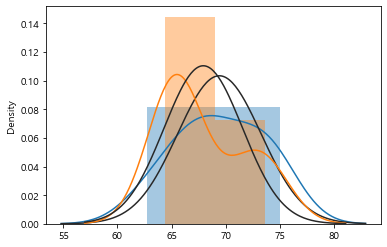

In [60]:
# 정규분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리
plt.rc("font", family = "Malgun Gothic")

# x: 데이터 집합
# stats.norm : 정규 분포 표시
sns.distplot(x1, fit=stats.norm)
sns.distplot(x2, fit=stats.norm)
plt.show()

In [68]:
# 전/후 검증하기
result = stats.ttest_rel(x1, x2)
print("검정 결과 = ", result)
print("검정 통계량 = %.3f,   p-value = %.3f" % (result))

# (해석)
# 1. p-value = 0.434 > 0.05 이므로, 귀무가설 채택
# 2. 귀무가설 채택 : 전/후 데이터 차이는 없다.
#                : 복부 수술 전/후의 몸무게 변화의 차이는 없다.

검정 결과 =  Ttest_relResult(statistic=4.037616799743391, pvalue=0.00010658658319794329)
검정 통계량 = 4.038,   p-value = 0.000


### exe-3) 정답

In [72]:
import numpy as np
import scipy.stats as stats
from seaborn.distributions import distplot

In [73]:
### 데이터 생성하기
# 수술전
x1 = [67.2, 67.4, 71.5, 77.6, 86.0, 89.1, 59.5, 81.9, 105.5]

# 수술후
x2 = [62.4, 64.6, 70.4, 62.6, 80.1, 73.2, 58.2, 71.0, 101.0]

In [74]:
# 정규성 검정(stats.shapiro())
# 검증 시 대부분의 집단은 정규분포를 따른다는 가정하에 진행하는 것이 일반적
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 띈다.

resultSh = stats.shapiro(x1)
print("정규성 검정 결과 = ", resultSh)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.810 > 0.05 이므로, 정규성을 만족한다.
print()

resultSh = stats.shapiro(x2)
print("정규성 검정 결과 = ", resultSh)
print("t-검정 통계량 = %.3f,    p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.071 > 0.05 이므로, 정규성을 만족한다.

정규성 검정 결과 =  ShapiroResult(statistic=0.9611198306083679, pvalue=0.809967577457428)
t-검정 통계량 = 0.961,    p-value = 0.810

정규성 검정 결과 =  ShapiroResult(statistic=0.8478229641914368, pvalue=0.0705145075917244)
t-검정 통계량 = 0.848,    p-value = 0.071


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


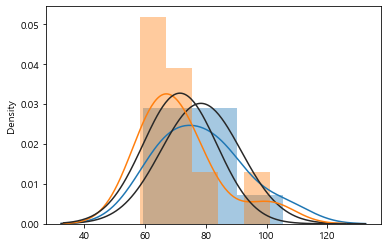

In [75]:
# 정규분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리
plt.rc("font", family = "Malgun Gothic")

# x: 데이터 집합
# stats.norm : 정규 분포 표시
sns.distplot(x1, fit=stats.norm)
sns.distplot(x2, fit=stats.norm)
plt.show()

In [78]:
# 전/후 검증하기
result = stats.ttest_rel(x1, x2)
print("검정 결과 = ", result)
print("검정 통계량 = %.3f,   p-value = %.3f" % (result))

# (해석)
# 1. p-value = 0.006 < 0.05 이므로, 귀무가설 기각
# 2. 대립가설 채택 : 전/후 데이터 차이는 있다.
#                : 복부 수술 전/후의 몸무게 차이는 있다.

검정 결과 =  Ttest_relResult(statistic=3.6681166519351103, pvalue=0.006326650855933662)
검정 통계량 = 3.668,   p-value = 0.006
